# EARTHQUAKE HAPPENS, TSUNAMI?

# IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Dibimbing DS 24/earthquake_1995-2023.csv')
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df_copy = df.copy()

In [ ]:
df_nonNA = df_copy.copy()

In [ ]:
drop_columns = ['alert', 'location', 'continent', 'country']
df_nonNA = df_nonNA.drop(columns=drop_columns)

In [ ]:
df_nonNA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   tsunami    1000 non-null   int64  
 6   sig        1000 non-null   int64  
 7   net        1000 non-null   object 
 8   nst        1000 non-null   int64  
 9   dmin       1000 non-null   float64
 10  gap        1000 non-null   float64
 11  magType    1000 non-null   object 
 12  depth      1000 non-null   float64
 13  latitude   1000 non-null   float64
 14  longitude  1000 non-null   float64
dtypes: float64(6), int64(5), object(4)
memory usage: 117.3+ KB


In [ ]:
df_nonNA.head()

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960


## DESKRIPSI TIAP KOLOM

Datasets contain records of 782 earthquakes from 1/1/2001 to 1/1/2023. The meaning of all columns is as follows:

1. title: title name given to the earthquake
2. magnitude: The magnitude of the earthquake
3. date_time: date and time
4. cdi: The maximum reported intensity for the event range
5. mmi: The maximum estimated instrumental intensity for the event
6. tsunami: "1" for events in oceanic regions and "0" otherwise
7. sig: A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact
8. net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
9. nst: The total number of seismic stations used to determine earthquake location.
10. dmin: Horizontal distance from the epicenter to the nearest station
11. gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number, the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal gap exceeds 180 degrees typically have large location and depth uncertainties
12. magType: The method or algorithm used to calculate the preferred magnitude for the event
13. depth: The depth where the earthquake begins to rupture
14. latitude / longitude: coordinate system by means of which the position or location of any place on Earth's surface can be determined and described

In [ ]:
df_nonNA.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
df_nonNA['magType'].value_counts()

magType
mww    502
mwc    332
mwb    100
mw      51
Mi       5
mb       4
ms       3
md       2
ml       1
Name: count, dtype: int64

## KONVERSI SATUAN MAGNITUDO MENJADI MAGNITUDO MOMEN

In [ ]:
# Membuat fungsi konversi mag_type menjadi seragam yaitu Mw(Magnitude Momen)
def convert_magnitude(magType, magnitude):
    if magType in ['mw', 'mww', 'mwc', 'mwb']:
        return magnitude
    elif magType == 'Mi':
        return magnitude
    elif magType == 'mb':
        return 0.85 * magnitude + 1.03
    elif magType == 'ms':
        return 1.0 * magnitude
    elif magType == 'md':
        return 0.67 * magnitude + 2.07
    elif magType == 'ml':
        return 0.67 * magnitude + 2.07
    else:
        return None

# Menerapkan fungsi diatas ke setiap baris
df_nonNA['magnitude_Mw'] = df_copy.apply(lambda row: convert_magnitude(row['magType'], row['magnitude']), axis=1)

df_nonNA.tail()

,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,magnitude_Mw
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,0,776,us,0,0.0,0.0,mwb,11.0,52.629,142.827,7.1
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,0,912,us,0,0.0,0.0,mw,20.2,-23.008,169.900,7.7
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,0,732,us,0,0.0,0.0,mw,11.2,-8.378,125.127,6.9
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,0,670,us,0,0.0,0.0,mw,14.0,40.149,21.695,6.6
999,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,05-05-1995 03:53,0,7,0,776,us,0,0.0,0.0,mw,16.0,12.626,125.297,7.1


# VISUALISASI DATA DAN EDA

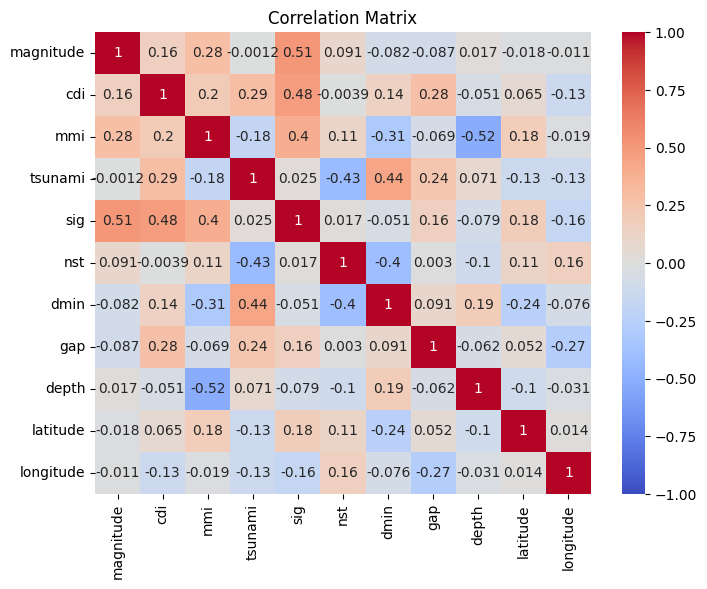

In [ ]:
correlation_matrix = df_nonNA[['magnitude', 'cdi', 'mmi', 'tsunami','sig','nst','dmin','gap','depth','latitude','longitude']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Korelasi matrix ini sangat lemah; tidak ada korelasi antara variablenya.

### PERBANDINGAN

<ipython-input-151-8177e34298fe>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='tsunami', y='depth', data=df_nonNA, palette='Set1', alpha=0.7)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packag

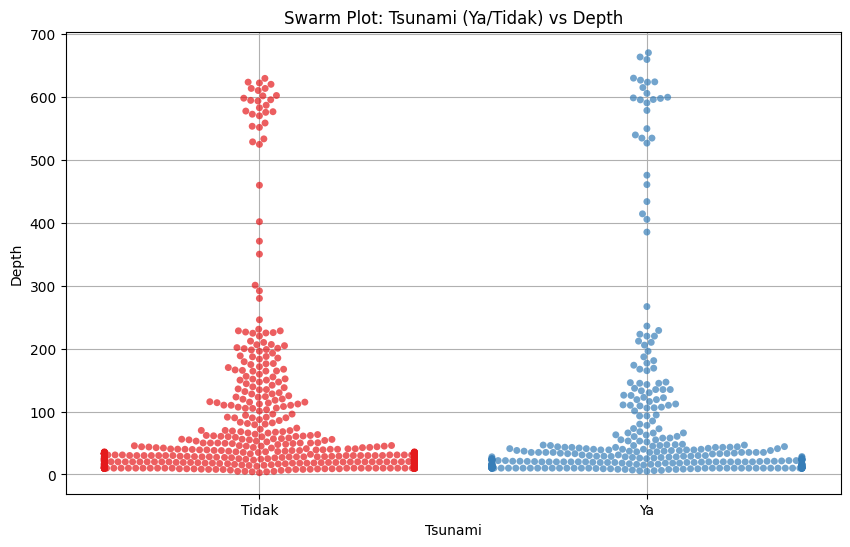

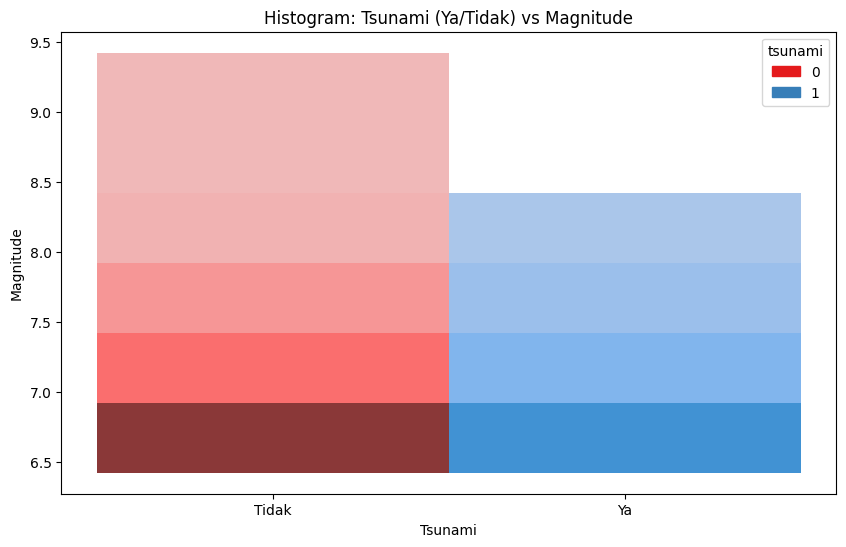

In [ ]:
# EDA
# Swarm plot: Tsunami vs Depth
plt.figure(figsize=(10, 6))
sns.swarmplot(x='tsunami', y='depth', data=df_nonNA, palette='Set1', alpha=0.7)
plt.title('Swarm Plot: Tsunami (Ya/Tidak) vs Depth')
plt.xlabel('Tsunami')
plt.ylabel('Depth')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.grid(True)
plt.show()

# Plot histogram untuk variabel tsunami (X) dengan magnitude (Y)
plt.figure(figsize=(10, 6))
sns.histplot(data=df_nonNA, x='tsunami', hue='tsunami', y='magnitude_Mw', bins=[-0.1, 0.25, 0.75, 1.1], binwidth=0.5, kde=True, palette='Set1')
plt.title('Histogram: Tsunami (Ya/Tidak) vs Magnitude')
plt.xlabel('Tsunami')
plt.ylabel('Magnitude')
# Mengatur label sumbu x untuk Tidak dan Ya dengan sedikit gap
plt.xticks([0.25, 0.75], ['Tidak', 'Ya'])
plt.show()


jadi dari visualisasi diatas maka data terjadinya tsunami banyak terjadi di kedalaman dangkal dan dengan magnitudo momen yang sama dari 6.5 sampai 8.5 SR. dan untuk tsunami yang tidak terjadi berada pada magnitudo 8-9.5 yang paling besar dan kedalaman 0-100 KM

<ipython-input-152-ddc9ee70647f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['magnitude_Mw'] = df_cluster['magnitude_Mw'].round(2)


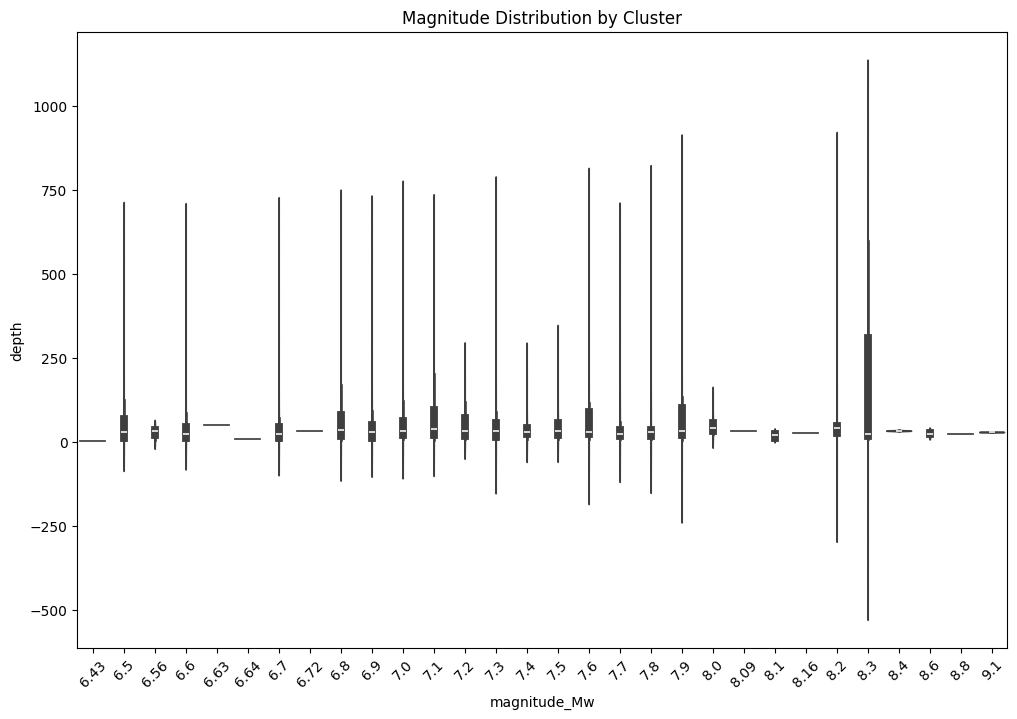

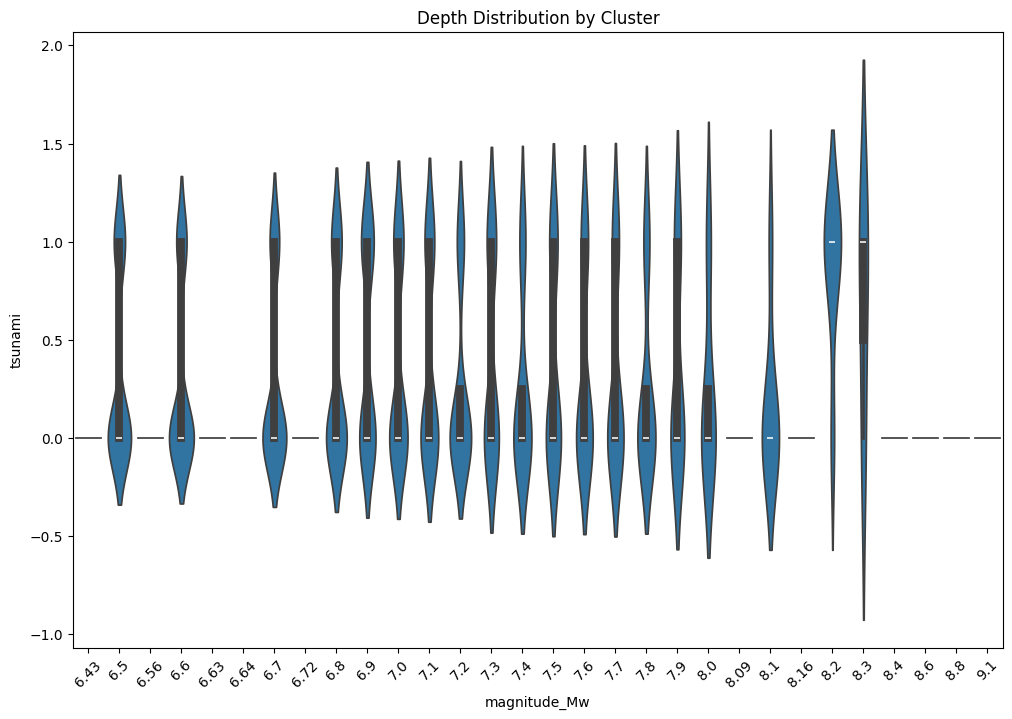

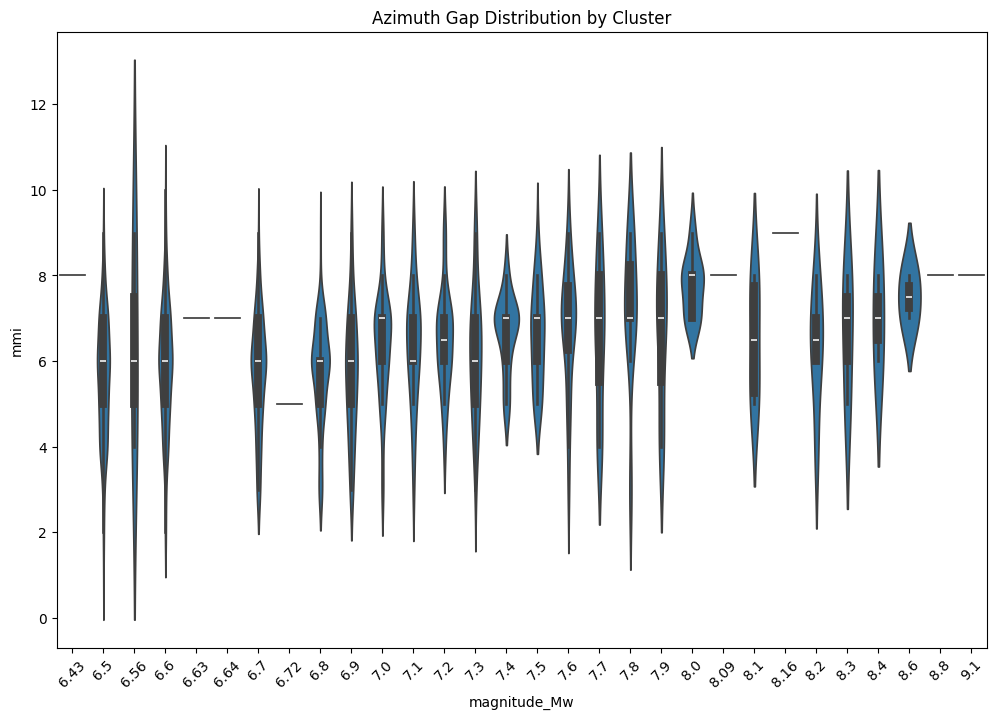

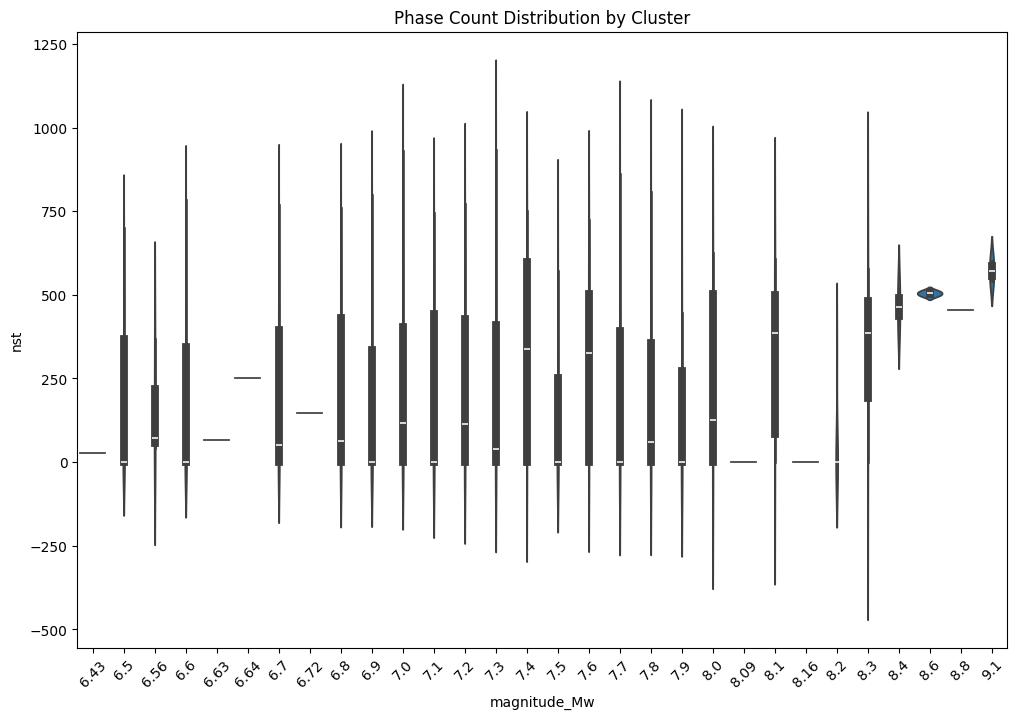

In [ ]:
df_cluster['magnitude_Mw'] = df_cluster['magnitude_Mw'].round(2)

# Violin plot untuk membandingkan distribusi fitur antara beberapa variable
plt.figure(figsize=(12, 8))
sns.violinplot(x='magnitude_Mw', y='depth', data=df_cluster)
plt.title('Magnitude Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='magnitude_Mw', y='tsunami', data=df_cluster)
plt.title('Depth Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='magnitude_Mw', y='mmi', data=df_cluster)
plt.title('Azimuth Gap Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='magnitude_Mw', y='nst', data=df_cluster)
plt.title('Phase Count Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

# MEMBUAT KLUSTER DATA

In [ ]:
df_cluster = df_nonNA[['magnitude_Mw', 'cdi', 'mmi', 'tsunami','sig','nst','dmin','gap','depth','latitude','longitude']]

## NORMALISASI DATA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Inisiasi
scaler = MinMaxScaler()

# Fit dan transformasi data
normalized_data = scaler.fit_transform(df_cluster)

print("Normalized Data (Min-Max Scaling):")
print(normalized_data)

Normalized Data (Min-Max Scaling):
[[0.02803738 0.77777778 0.33333333 ... 0.28476598 0.35935828 0.96523093]
 [0.02803738 0.88888889 0.55555556 ... 0.1003233  0.55935439 0.25537775]
 [0.06542056 0.77777778 0.44444444 ... 0.25245992 0.17723532 0.30474349]
 ...
 [0.17757009 0.         0.55555556 ... 0.01272246 0.40058855 0.84835803]
 [0.06542056 0.         0.88888889 ... 0.01691338 0.76414224 0.56075133]
 [0.25233645 0.         0.66666667 ... 0.0199069  0.55794593 0.84883074]]


## ELBOW METHODE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

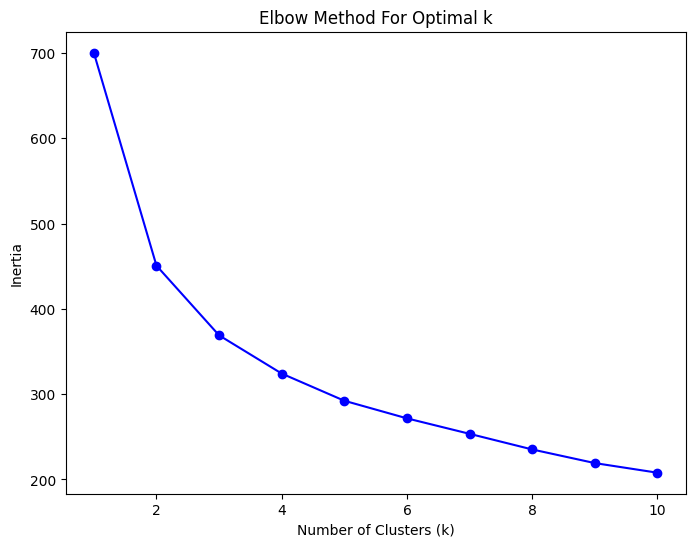

In [ ]:
from sklearn.cluster import KMeans

# Menentukan inertia
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

## MENENTUKAN JUMLAH K DARI HASIL ELBOW METHOD

In [ ]:
# Menentukan jumlah cluster optimal berdasarkan Elbow Method
# Elbow method - finding the "elbow" point
optimal_k_elbow = K[inertia.index(min(inertia, key=lambda x: abs(x - (min(inertia) + max(inertia)) / 2)))]

print(f"Optimal k (Elbow Method): {optimal_k_elbow}")

Optimal k (Elbow Method): 2


## K-MEAN CLUSTERING

In [ ]:
from sklearn.cluster import KMeans

optimal_k = 2

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(normalized_data)

# Mendapatkan label dan centroid
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Labels:", labels)
print("Centroids:", centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Labels: [0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

In [ ]:
# Menambahkan label cluster ke dataframe asli
df_cluster['Cluster'] = labels

<ipython-input-86-4f958279bb1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = labels


## MEMBUAT VISUALISASI RADAR DARI HASIL K-MEANS

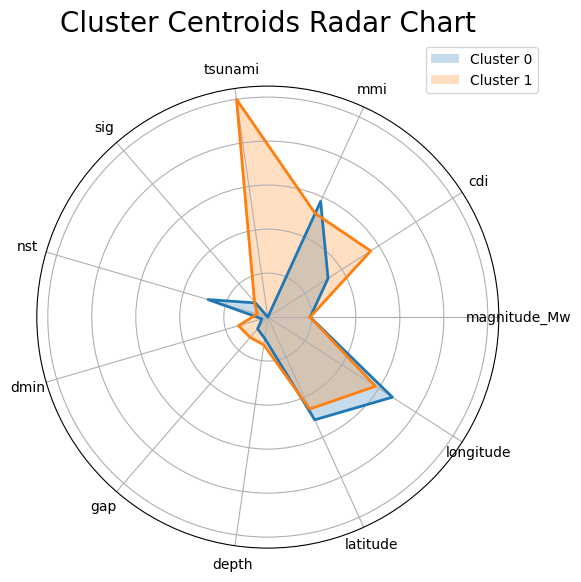

In [ ]:
# Visualisasi dengan radar chart
def create_radar_chart(data, labels, title):
    num_vars = data.shape[1]

    # Menghitung angle dari setiap axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Membuat loop
    data = np.concatenate((data, data[:, [0]]), axis=1)
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for idx, (d, label) in enumerate(zip(data, labels)):
        ax.fill(angles, d, alpha=0.25, label=f'Cluster {label}')
        ax.plot(angles, d, linewidth=2, linestyle='solid')

    # Memberikan label setiap axis
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(feature_names)

    plt.title(title, size=20, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Inputting the features
feature_names = ['magnitude_Mw', 'cdi', 'mmi', 'tsunami','sig','nst','dmin','gap','depth','latitude','longitude']

# Plot radar chart
create_radar_chart(centroids, range(optimal_k), "Cluster Centroids Radar Chart")

In [ ]:
df_cluster.tail()

,magnitude_Mw,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Cluster
995,7.1,0,9,0,776,0,0.0,0.0,11.0,52.629,142.827,0
996,7.7,0,4,0,912,0,0.0,0.0,20.2,-23.008,169.900,0
997,6.9,0,6,0,732,0,0.0,0.0,11.2,-8.378,125.127,0
998,6.6,0,9,0,670,0,0.0,0.0,14.0,40.149,21.695,0
999,7.1,0,7,0,776,0,0.0,0.0,16.0,12.626,125.297,0


## HASIL K-MEANS

In [ ]:
df_cluster.groupby(['Cluster']).agg({'magnitude_Mw': 'mean', 'cdi': 'mean', 'mmi': 'mean', 'tsunami': 'mean','sig': 'mean', 'nst': 'mean','dmin': 'mean','gap': 'mean','depth': 'mean','latitude': 'mean','longitude': 'mean','Cluster': 'mean'})

,magnitude_Mw,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Cluster
Cluster,,,,,,,,,,,,
0,6.940200,2.930370,6.201481,0.0,842.714074,264.548148,0.487960,16.925615,68.197874,6.661453,62.187666,0.0
1,6.939385,5.006154,5.664615,1.0,858.716923,47.224615,2.448619,29.235385,87.935311,-0.556696,29.261235,1.0


## CEK IMBALANCE DATA HASIL K-MEANS

In [ ]:
df_cluster['Cluster'].value_counts()

Cluster
0    675
1    325
Name: count, dtype: int64

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   magnitude_Mw  1000 non-null   float64
 1   cdi           1000 non-null   int64  
 2   mmi           1000 non-null   int64  
 3   tsunami       1000 non-null   int64  
 4   sig           1000 non-null   int64  
 5   nst           1000 non-null   int64  
 6   dmin          1000 non-null   float64
 7   gap           1000 non-null   float64
 8   depth         1000 non-null   float64
 9   latitude      1000 non-null   float64
 10  longitude     1000 non-null   float64
 11  Cluster       1000 non-null   int32  
dtypes: float64(6), int32(1), int64(5)
memory usage: 90.0 KB


# MACHINE LEARNING

## PEMISAHAN DATA DAN MANIPULASI DATA SEBELUM MACHINE LEARNING

In [ ]:
df_split = df_nonNA[['magnitude_Mw', 'cdi', 'mmi', 'tsunami','sig','nst','dmin','gap','depth','latitude','longitude']]

In [ ]:
df_splited = df_split.copy()

In [ ]:
df_splited.head()

,magnitude_Mw,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Memisahkan fitur (X) dan target (y)
X = df_splited[['magnitude_Mw', 'cdi', 'mmi','sig','nst','dmin','gap','depth','latitude','longitude']]
y = df_splited['tsunami']

# Mengatasi nilai yang hilang dengan menggunakan median
X['magnitude_Mw'] = X['magnitude_Mw'].fillna(X['magnitude_Mw'].median())
X['cdi'] = X['cdi'].fillna(X['cdi'].median())
X['mmi'] = X['mmi'].fillna(X['mmi'].median())
X['sig'] = X['sig'].fillna(X['sig'].median())
X['nst'] = X['nst'].fillna(X['nst'].median())
X['dmin'] = X['dmin'].fillna(X['dmin'].median())
X['gap'] = X['gap'].fillna(X['gap'].median())
X['depth'] = X['depth'].fillna(X['depth'].median())
X['latitude'] = X['latitude'].fillna(X['latitude'].median())
X['longitude'] = X['longitude'].fillna(X['longitude'].median())

<ipython-input-95-56c1a290d54c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['magnitude_Mw'] = X['magnitude_Mw'].fillna(X['magnitude_Mw'].median())
<ipython-input-95-56c1a290d54c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cdi'] = X['cdi'].fillna(X['cdi'].median())
<ipython-input-95-56c1a290d54c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
df_splited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   magnitude_Mw  1000 non-null   float64
 1   cdi           1000 non-null   int64  
 2   mmi           1000 non-null   int64  
 3   tsunami       1000 non-null   int64  
 4   sig           1000 non-null   int64  
 5   nst           1000 non-null   int64  
 6   dmin          1000 non-null   float64
 7   gap           1000 non-null   float64
 8   depth         1000 non-null   float64
 9   latitude      1000 non-null   float64
 10  longitude     1000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 86.1 KB


In [ ]:
# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# random_state digunakan untuk memastikan hasil split yang konsisten
# test_size adalah proporsi data yang dialokasikan untuk data testing (test_size=0.2 artinya 20% dialokasikan untuk data testing)

In [ ]:
from imblearn.over_sampling import SMOTE

# Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## RANDOM FOREST

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Melatih model RandomForest pada data yang sudah di-oversampling
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 1.0000
F1-score untuk data test    : 0.8507
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.0000
RMSE untuk data test    : 0.3162
Model cenderung underfitting pada data training.


## XG BOOST

In [ ]:
from sklearn.metrics import f1_score, mean_squared_error
from xgboost import XGBClassifier
import numpy as np

# Melatih model XGBoost pada data yang sudah di-oversampling
model = XGBClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")


F1-score untuk data training: 1.0000
F1-score untuk data test    : 0.8657
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.0000
RMSE untuk data test    : 0.3000
Model cenderung underfitting pada data training.


## GRADIENT BOOSTING

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

# Melatih model GradientBoostingClassifier pada data yang sudah di-oversampling
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.9506
F1-score untuk data test    : 0.8421
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.1803
RMSE untuk data test    : 0.3240
Model cenderung underfitting pada data training.


## SVM (SUPPORT VECTOR MACHINE)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
import numpy as np

# Melatih model SVC pada data yang sudah di-oversampling
model = SVC(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.6512
F1-score untuk data test    : 0.6484
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.5657
RMSE untuk data test    : 0.5657
Model memiliki performa yang konsisten baik pada data training dan data test.


## NAIVE BAYES

In [ ]:
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
import numpy as np

# Melatih model Naive Bayes Gaussian pada data yang sudah di-oversampling
model = GaussianNB()
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.7465
F1-score untuk data test    : 0.7194
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.4243
RMSE untuk data test    : 0.4416
Model cenderung underfitting pada data training.


## ADAPTIVE BOOSTING

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

# Melatih model AdaBoost pada data yang sudah di-oversampling
model = AdaBoostClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.8905
F1-score untuk data test    : 0.7971
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.2716
RMSE untuk data test    : 0.3742
Model cenderung underfitting pada data training.


## DECISION TREE

In [ ]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

# Melatih model Decision Tree pada data yang sudah di-oversampling
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 1.0000
F1-score untuk data test    : 0.7941
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.0000
RMSE untuk data test    : 0.3742
Model cenderung underfitting pada data training.


## MLP (MULTILAYER PERCEPTRON) FROM ARTIFICIAL NEURAL NETWORK

In [ ]:
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import numpy as np

# Melatih model MLPClassifier (Neural Network) pada data yang sudah di-oversampling
model = MLPClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

if rmse_train > rmse_test:
    print("Model cenderung overfitting pada data training.")
elif rmse_train < rmse_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.6966
F1-score untuk data test    : 0.6435
Model cenderung overfitting pada data training.
RMSE untuk data training: 0.4108
RMSE untuk data test    : 0.4528
Model cenderung underfitting pada data training.


## CEK HASIL MACHINE LEARNING DENGAN SVM DAN NAIVE BAYES

SVM menampilkan hasil yang seimbang antara data train dan test sehingga dijadikan analisis pada hasil pemrosesan datanya

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
import numpy as np

# Definisi model SVM
model_svm = SVC(random_state=42)

# Definisi scorer untuk cross-validation berdasarkan F1-score
scorer = make_scorer(f1_score)

# Melakukan cross validation untuk 5 fold
cv_scores = cross_val_score(model_svm, X_train_resampled, y_train_resampled, cv=5, scoring=scorer)

# Print hasil F1-score untuk setiap fold
print("Hasil F1-score untuk setiap fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

# Print rata-rata dan standar deviasi dari F1-score
print(f"Rata-rata F1-score: {np.mean(cv_scores):.4f}")
print(f"Standar deviasi F1-score: {np.std(cv_scores):.4f}")

Hasil F1-score untuk setiap fold:
Fold 1: 0.7680
Fold 2: 0.8268
Fold 3: 0.7686
Fold 4: 0.7760
Fold 5: 0.7605
Rata-rata F1-score: 0.7800
Standar deviasi F1-score: 0.0239


Karena Naive Bayes memiliki nilai F-1 score yang paling berdekatan diantara data underfitting dan overfitting lainnya, maka Naive Bayes dijadikan analisis hasil pemrosesan data untuk dibandingkan dengan data dari SVM

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Definisi model Naive Bayes
model_nb = GaussianNB()

# Definisi scorer untuk cross-validation berdasarkan F1-score
scorer = make_scorer(f1_score)

# Melakukan cross-validation dengan 5-fold
cv_scores = cross_val_score(model_nb, X_train_resampled, y_train_resampled, cv=5, scoring=scorer)

# Print hasil F1-score untuk setiap fold
print("Hasil F1-score untuk setiap fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

# Print rata-rata dan standar deviasi dari F1-score
print(f"Rata-rata F1-score: {np.mean(cv_scores):.4f}")
print(f"Standar deviasi F1-score: {np.std(cv_scores):.4f}")

Hasil F1-score untuk setiap fold:
Fold 1: 0.8095
Fold 2: 0.8304
Fold 3: 0.8311
Fold 4: 0.8744
Fold 5: 0.8458
Rata-rata F1-score: 0.8382
Standar deviasi F1-score: 0.0215


# HASIL ANALISIS HASIL SVM DAN NAIVE BAYES

1. Rata-rata F1-score

a) SVM memiliki rata-rata F1-score sebesar 0.7800.

b) Naive Bayes memiliki rata-rata F1-score sebesar 0.8382.

Naive Bayes secara konsisten memberikan rata-rata F1-score yang lebih tinggi (0.8382) dibandingkan dengan SVM (0.7800). Artinya, dalam kasus ini, Naive Bayes cenderung memberikan kinerja yang lebih baik dalam hal F1-score secara keseluruhan.

2. Standar Deviasi F1-score

a) SVM memiliki standar deviasi F1-score sebesar 0.0239.

b) Naive Bayes memiliki standar deviasi F1-score sebesar 0.0215.

Kedua model menunjukkan standar deviasi yang relatif rendah, menandakan bahwa hasil F1-score dari cross-validation mereka stabil atau konsisten antar fold.

**Kesimpulan:**

Performa Rata-rata: Naive Bayes memiliki performa rata-rata yang lebih tinggi dibandingkan SVM berdasarkan F1-score.

Konsistensi: Kedua model menunjukkan tingkat konsistensi yang baik, dengan standar deviasi yang rendah.

# FITTING MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.svm import SVC

# Definisi model SVM
svm_model = SVC(random_state=42)

# Definisi parameter grid untuk hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Inisiasi objek scorer untuk F1-score
scorer = make_scorer(f1_score)

# Inisiasi GridSearchCV untuk hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Mendapatkan model terbaik setelah tuning
best_svm = grid_search.best_estimator_

# Memprediksi label pada data training dan data test
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

# Melakukan cross-validation untuk mengevaluasi model
cv_results = cross_val_score(best_svm, X_train_resampled, y_train_resampled, cv=5, scoring=scorer)
print("Hasil cross-validation F1-score:", cv_results)

# Menghitung RMSE untuk data training dan data test
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print hasil RMSE
print(f"RMSE untuk data training: {rmse_train:.4f}")
print(f"RMSE untuk data test    : {rmse_test:.4f}")

# Evaluasi performa model
if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.7946
F1-score untuk data test    : 0.7500
Hasil cross-validation F1-score: [0.84931507 0.87336245 0.87826087 0.88181818 0.87931034]
RMSE untuk data training: 0.3889
RMSE untuk data test    : 0.4359
Model cenderung overfitting pada data training.


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Definisi model Naive Bayes
nb_model = GaussianNB()

# Inisiasi objek scorer untuk F1-score
scorer = make_scorer(f1_score)

# Fitting model Naive Bayes
nb_model.fit(X_train_resampled, y_train_resampled)

# Memprediksi label pada data training dan data test
y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# Menghitung F1-score untuk data training dan data test
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print hasil F1-score
print(f"F1-score untuk data training: {f1_train:.4f}")
print(f"F1-score untuk data test    : {f1_test:.4f}")

# Melakukan cross-validation untuk mengevaluasi model
cv_results = cross_val_score(nb_model, X_train_resampled, y_train_resampled, cv=5, scoring=scorer)
print("Hasil cross-validation F1-score:", cv_results)

# Evaluasi performa model
if f1_train > f1_test:
    print("Model cenderung overfitting pada data training.")
elif f1_train < f1_test:
    print("Model cenderung underfitting pada data training.")
else:
    print("Model memiliki performa yang konsisten baik pada data training dan data test.")

F1-score untuk data training: 0.7465
F1-score untuk data test    : 0.7194
Hasil cross-validation F1-score: [0.80952381 0.83035714 0.83105023 0.8744186  0.84581498]
Model cenderung overfitting pada data training.


# IMPORT DATA BARU

In [ ]:
new_data = pd.read_csv('earthquake_data.csv')

In [ ]:
new_data.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,NaN,NaN,NaN


In [ ]:
new_data_cluster = new_data[['magnitude', 'cdi', 'mmi', 'tsunami','sig','nst','dmin','gap','depth','latitude','longitude']]

In [ ]:
new_data_cluster.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,7.0,8,7,1,768,117,0.509,17.0,14.000,-9.7963,159.596
1,6.9,4,4,0,735,99,2.229,34.0,25.000,-4.9559,100.738
2,7.0,3,3,1,755,147,3.125,18.0,579.000,-20.0508,-178.346
3,7.3,5,5,1,833,149,1.865,21.0,37.000,-19.2918,-172.129
4,6.6,0,2,1,670,131,4.998,27.0,624.464,-25.5948,178.278


In [ ]:
# Membuat fungsi konversi mag_type menjadi seragam yaitu Mw(Magnitude Momen)
def convert_magnitude(magType, magnitude):
    if magType in ['mw', 'mww', 'mwc', 'mwb']:
        return magnitude
    elif magType == 'Mi':
        return magnitude
    elif magType == 'mb':
        return 0.85 * magnitude + 1.03
    elif magType == 'ms':
        return 1.0 * magnitude
    elif magType == 'md':
        return 0.67 * magnitude + 2.07
    elif magType == 'ml':
        return 0.67 * magnitude + 2.07
    else:
        return None

# Menerapkan fungsi diatas ke setiap baris
new_data_cluster['magnitude_Mw'] = new_data.apply(lambda row: convert_magnitude(row['magType'], row['magnitude']), axis=1)

df_nonNA.tail()

<ipython-input-128-732092863623>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_cluster['magnitude_Mw'] = new_data.apply(lambda row: convert_magnitude(row['magType'], row['magnitude']), axis=1)


,title,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,magnitude_Mw
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,0,776,us,0,0.0,0.0,mwb,11.0,52.629,142.827,7.1
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,0,912,us,0,0.0,0.0,mw,20.2,-23.008,169.900,7.7
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,0,732,us,0,0.0,0.0,mw,11.2,-8.378,125.127,6.9
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,0,670,us,0,0.0,0.0,mw,14.0,40.149,21.695,6.6
999,"M 7.1 - 14 km NE of Cabatuan, Philippines",7.1,05-05-1995 03:53,0,7,0,776,us,0,0.0,0.0,mw,16.0,12.626,125.297,7.1


# FIT MODEL KE DATA BARU

In [ ]:
# Menerapkan setiap variable yang digunakan dalam machine learning SVM ke data baru
X_new = new_data_cluster[['magnitude_Mw', 'cdi', 'mmi','sig','nst','dmin','gap','depth','latitude','longitude']]
# X_new = new_data_cluster.drop('label', axis=1)
# X_new = new_data_cluster.drop('magnitude', 'cdi', 'mmi', 'tsunami','sig','nst','dmin','gap','depth','latitude','longitude', axis=1)

# Memprediksi label menggunakan model SVM yang sudah ditraining
y_pred_svm = best_svm.predict(X_new)

# Memprediksi label menggunakan model Naive Bayes yang sudah ditraining
y_pred_nb = nb_model.predict(X_new)

results_svm = pd.DataFrame({'Prediction_SVM': y_pred_svm})
results_nb = pd.DataFrame({'Prediction_NaiveBayes': y_pred_nb})

# Menampilkan hasil prediksi
print("Hasil prediksi menggunakan SVM:")
print(results_svm.head())

print("\nHasil prediksi menggunakan Naive Bayes:")
print(results_nb.head())

Hasil prediksi menggunakan SVM:
   Prediction_SVM
0               1
1               1
2               1
3               1
4               1

Hasil prediksi menggunakan Naive Bayes:
   Prediction_NaiveBayes
0                      0
1                      1
2                      1
3                      1
4                      1


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Definisi model Naive Bayes
nb_model = GaussianNB()

# Fitting model Naive Bayes ke data training yang sudah di-resample
nb_model.fit(X_train_resampled, y_train_resampled)

# Data baru yang ingin diprediksi (contoh: X_new)
X_new = new_data_cluster[['magnitude_Mw', 'cdi', 'mmi','sig','nst','dmin','gap','depth','latitude','longitude']]

# Prediksi label untuk data baru
y_pred_new = nb_model.predict(X_new)

# Print hasil prediksi
print("Hasil prediksi untuk data baru:")
print(y_pred_new)

Hasil prediksi untuk data baru:
[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [ ]:
# Contoh hasil prediksi dari SVM dan Naive Bayes
y_pred_svm = best_svm.predict(X_new)
y_pred_nb = nb_model.predict(X_new)

# Membuat DataFrame untuk hasil prediksi
results = pd.DataFrame({
    'Kedalaman': new_data['depth'],
    'Magnitudo' : new_data['magnitude'],
    'Kejadian_Tsunami' : new_data['tsunami'],
    'Prediction_SVM': y_pred_svm,
    'Prediction_NaiveBayes': y_pred_nb
})

# Menampilkan hasil prediksi
print("Hasil prediksi:")
print(results.head())
print(results.tail())


Hasil prediksi:
   Kedalaman  Magnitudo  Kejadian_Tsunami  Prediction_SVM  \
0     14.000        7.0                 1               1   
1     25.000        6.9                 0               1   
2    579.000        7.0                 1               1   
3     37.000        7.3                 1               1   
4    624.464        6.6                 1               1   

   Prediction_NaiveBayes  
0                      0  
1                      1  
2                      1  
3                      1  
4                      1  
     Kedalaman  Magnitudo  Kejadian_Tsunami  Prediction_SVM  \
777       60.0        7.7                 0               0   
778       36.4        6.9                 0               0   
779      103.0        7.1                 0               0   
780       33.0        6.8                 0               0   
781       33.0        7.5                 0               0   

     Prediction_NaiveBayes  
777                      0  
778               

**JADI DENGAN MENGGUNAKAN SVM HASIL PREDIKSI MACHINE LEARNING PADA KEJADIAN GEMPA DAN TSUNAMI AKAN MENUNJUKKAN HASIL YANG LEBIH BAIK DAN MASUK AKAL DIBANDINGKAN DENGAN NAIVE BAYES.**